In [2]:
import pandas as pd

In [3]:
test = pd.read_csv("C:/Users/HP/Downloads/Academic_Performance - Academic_Performance.csv")

In [4]:
test

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,87.0,65.0,88,FIRST CLASS
12407,SB11201420573045,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,11.0,0.0,4,FIRST CLASS
12408,SB11201420578809,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,81.0,87.0,95,FIRST CLASS
12409,SB11201420578812,F,Yes,Yes,ACADEMIC,NaN,60.0,80.0,51.0,8.0,42.0,50,FIRST CLASS


In [5]:
test.head()

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS


In [6]:
test.shape

(12411, 13)

In [7]:
missing_values = test.isnull().sum()
print(missing_values)

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64


In [8]:
mis_value_percent = 100 * test.isnull().sum() / len(test)
print(mis_value_percent)

STUDENT_ID            0.000000
GENDER                0.177262
PLACEMENT             0.120861
HONOR_OPTED_OR_NOT    0.112803
EDUCATION_TYPE        0.120861
ACADEMIC_PROGRAM      0.273951
COURSE 1 MARKS        0.088631
COURSE 2 MARKS        0.064459
COURSE 3 MARKS        0.112803
COURSE 4 MARKS        0.112803
COURSE 5 MARKS        0.177262
PERCENTILE            0.000000
OVEARLL_GRADE         0.000000
dtype: float64


In [9]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import missingno as msno

<Axes: >

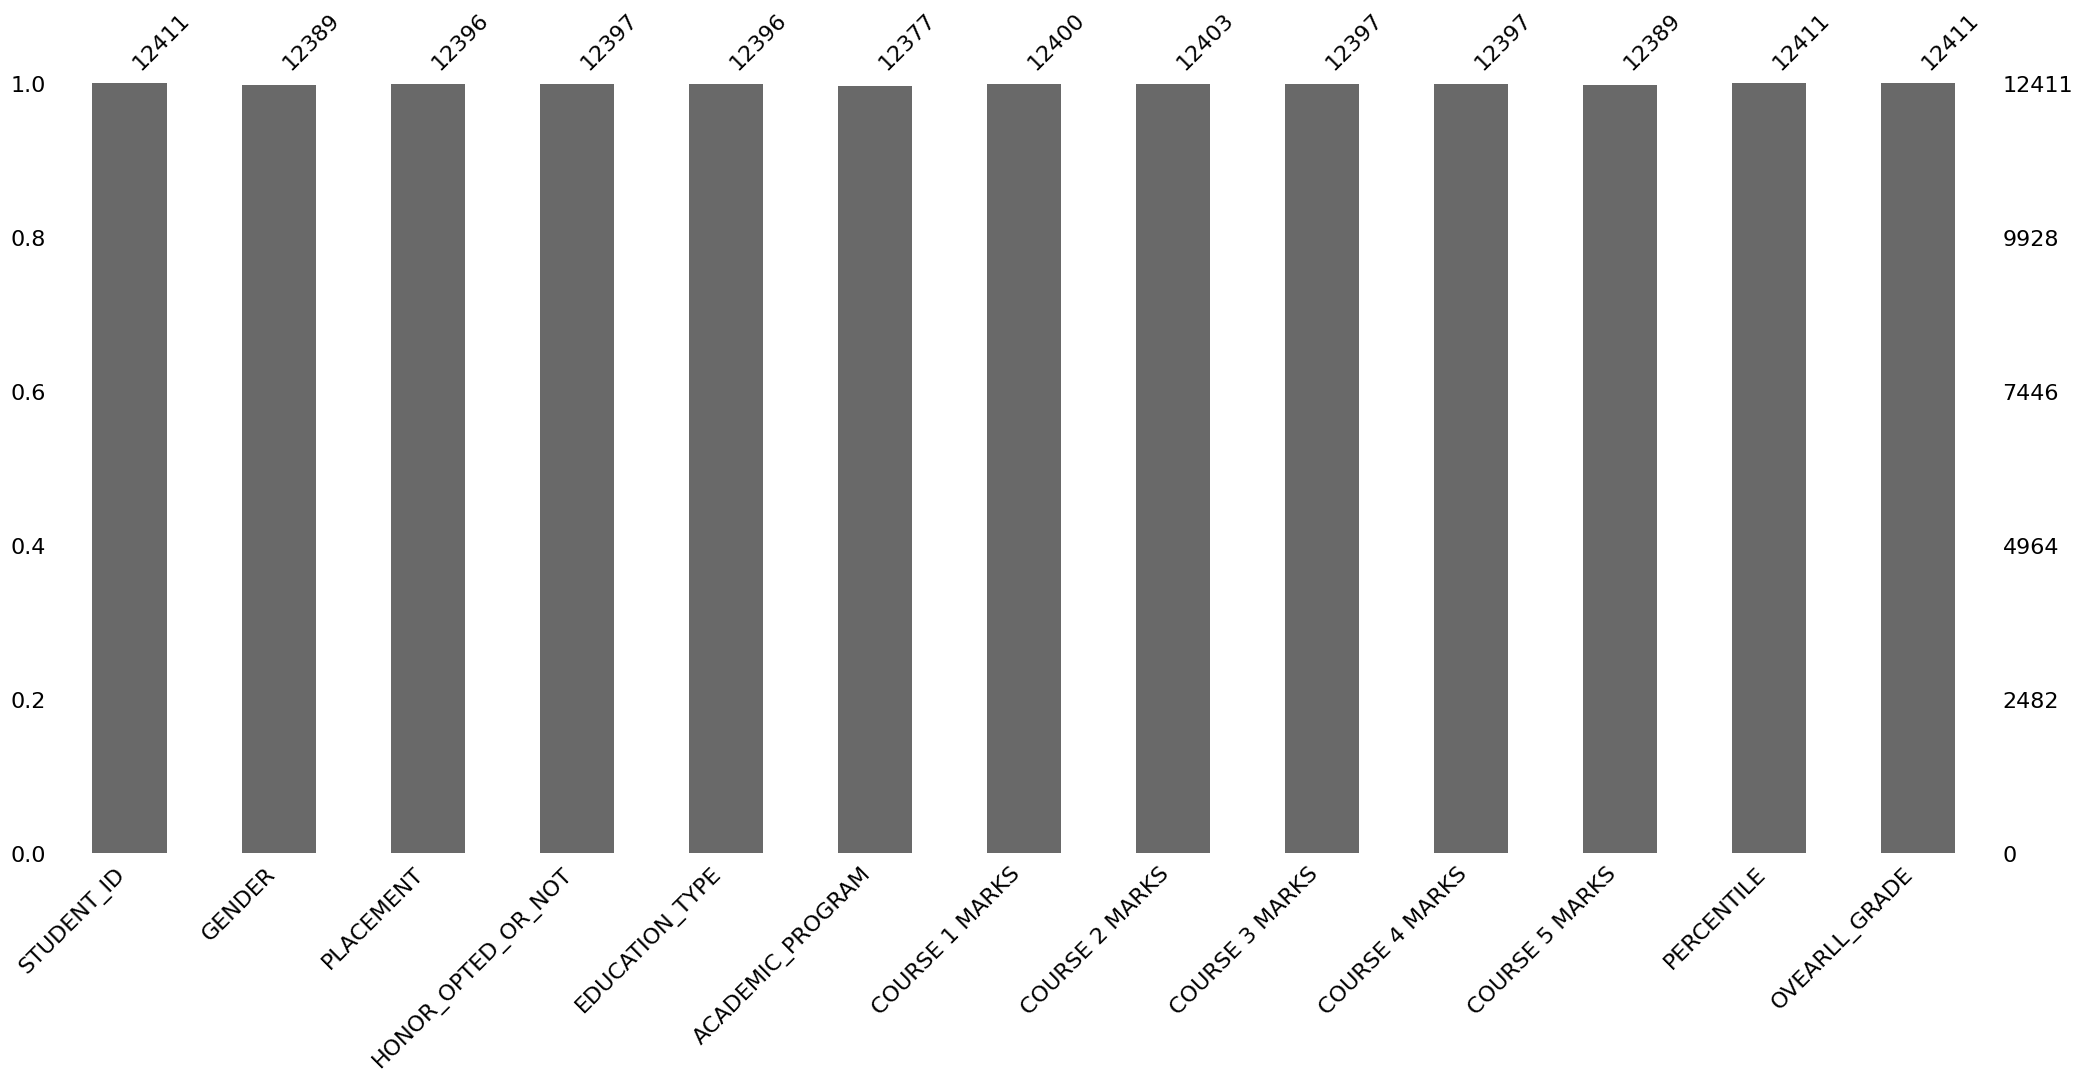

In [11]:
msno.bar(test)

In [12]:
import numpy as np

In [13]:
test['COURSE 1 MARKS'] = test['COURSE 1 MARKS'].replace(np.NaN,test['COURSE 1 MARKS'].mean())
test['COURSE 1 MARKS'].isnull().sum()

0

In [14]:
test['COURSE 2 MARKS'] = test['COURSE 2 MARKS'].fillna(0)
test['COURSE 2 MARKS'].isnull().sum()

0

In [15]:
test['COURSE 4 MARKS'] = test['COURSE 2 MARKS'].fillna(0)
test['COURSE 4 MARKS'].isnull().sum()

0

In [16]:
Y = pd.DataFrame(test['ACADEMIC_PROGRAM'])

In [17]:
Y

,ACADEMIC_PROGRAM
0,INDUSTRIAL ENGINEERING
1,INDUSTRIAL ENGINEERING
2,ELECTRONIC ENGINEERING
3,INDUSTRIAL ENGINEERING
4,INDUSTRIAL ENGINEERING
...,...
12406,MECHATRONICS ENGINEERING
12407,INDUSTRIAL ENGINEERING
12408,INDUSTRIAL ENGINEERING
12409,NaN


In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(Y)

array([['INDUSTRIAL ENGINEERING'],
       ['INDUSTRIAL ENGINEERING'],
       ['ELECTRONIC ENGINEERING'],
       ...,
       ['INDUSTRIAL ENGINEERING'],
       ['INDUSTRIAL ENGINEERING'],
       ['INDUSTRIAL ENGINEERING']], dtype=object)

In [19]:
imputer = SimpleImputer(strategy='constant',fill_value = 'missing')
imputer.fit_transform(Y)

array([['INDUSTRIAL ENGINEERING'],
       ['INDUSTRIAL ENGINEERING'],
       ['ELECTRONIC ENGINEERING'],
       ...,
       ['INDUSTRIAL ENGINEERING'],
       ['missing'],
       ['INDUSTRIAL ENGINEERING']], dtype=object)

In [20]:
missing_values = test.isnull().sum()
print(missing_values)

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS         0
COURSE 2 MARKS         0
COURSE 3 MARKS        14
COURSE 4 MARKS         0
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64


In [21]:
import seaborn as sns

<Axes: xlabel='COURSE 1 MARKS'>

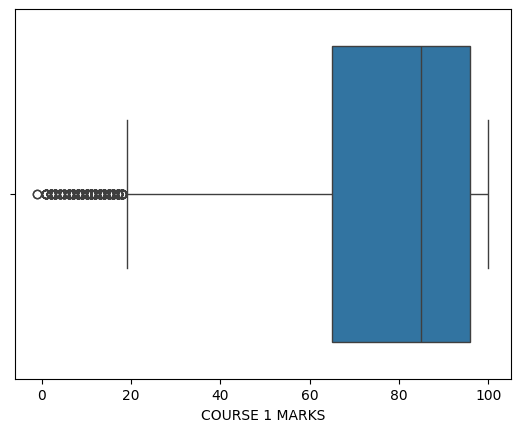

In [26]:
sns.boxplot(x=test['COURSE 1 MARKS'])

In [27]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'test["COURSE 1 MARKS"]')

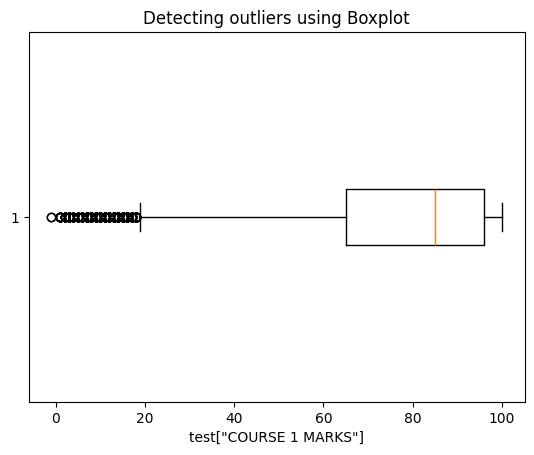

In [29]:
plt.boxplot(x=test['COURSE 1 MARKS'],vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('test["COURSE 1 MARKS"]')

In [30]:
import numpy as np
outliers= []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
mark_outliers = detect_outliers_zscore(test["COURSE 1 MARKS"])
print("Outliers from Z-scores method: ",mark_outliers)

Outliers from Z-scores method:  [4.0, 6.0, 3.0, 1.0, 5.0, 2.0, 8.0, 7.0, 2.0, 8.0, 6.0, 9.0, 2.0, 9.0, 8.0, 1.0, 9.0, 2.0, 2.0, 1.0, 6.0, 7.0, 4.0, 5.0, 9.0, 7.0, 9.0, 1.0, 2.0, 8.0, 5.0, 2.0, 8.0, 8.0, 1.0, 4.0, 7.0, 4.0, 7.0, 8.0, 3.0, 8.0, 5.0, 9.0, 7.0, 8.0, 7.0, 1.0, 9.0, 2.0, 7.0, 5.0, 3.0, 7.0, 3.0, 8.0, 6.0, 9.0, 8.0, 9.0, 6.0, 1.0, 7.0, 8.0, 1.0, 9.0, 1.0, 7.0, 8.0, 9.0, 6.0, 7.0, 7.0, 8.0, 4.0, 6.0, 6.0, 5.0, -1.0, 8.0, 8.0, 3.0, 1.0, 3.0, 3.0, 2.0, 9.0, 8.0, 3.0, 6.0, 3.0, 2.0, 7.0, 8.0, 4.0, 8.0, 3.0, 7.0, 9.0, 9.0, 3.0, 7.0, 6.0, 1.0, 1.0, 1.0, -1.0, 9.0, 4.0, 8.0, 7.0, 1.0, 6.0]


In [32]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if(i<lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers
marks_outliers = detect_outliers_iqr(test["COURSE 1 MARKS"])
print("Outliers from IQR method: ",marks_outliers)
    

Outliers from IQR method:  [-1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.

In [33]:
Q1 = test["COURSE 1 MARKS"].quantile(0.25)
Q3 = test["COURSE 1 MARKS"].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker,Upper_Whisker)

65.0
96.0
31.0
18.5 142.5


In [34]:
test = test[test['COURSE 1 MARKS'] < Upper_Whisker]

In [35]:
test

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,38.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,1.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,35.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,94.0,71.0,98,FIRST CLASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,88.0,71.0,86.0,71.0,65.0,88,FIRST CLASS
12407,SB11201420573045,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,46.0,39.0,44.0,39.0,0.0,4,FIRST CLASS
12408,SB11201420578809,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,98.0,88.0,90.0,88.0,87.0,95,FIRST CLASS
12409,SB11201420578812,F,Yes,Yes,ACADEMIC,NaN,60.0,80.0,51.0,80.0,42.0,50,FIRST CLASS


In [36]:
import numpy as np

In [38]:
performance_categorical = test.select_dtypes(exclude = [np.number])
performance_categorical

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,FIRST CLASS
12407,SB11201420573045,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12408,SB11201420578809,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12409,SB11201420578812,F,Yes,Yes,ACADEMIC,NaN,FIRST CLASS


In [39]:
performance_categorical['ACADEMIC_PROGRAM'].unique()

array(['INDUSTRIAL ENGINEERING', 'ELECTRONIC ENGINEERING',
       'CIVIL ENGINEERING', 'MECHANICAL ENGINEERING', nan,
       'ELECTRIC ENGINEERING',
       'ELECTRIC ENGINEERING AND TELECOMMUNICATIONS',
       'CHEMICAL ENGINEERING', 'AERONAUTICAL ENGINEERING',
       'MECHATRONICS ENGINEERING', 'INDUSTRIAL AUTOMATIC ENGINEERING',
       'TRANSPORTATION AND ROAD ENGINEERING', 'TOPOGRAPHIC ENGINEERY',
       'INDUSTRIAL CONTROL AND AUTOMATION ENGINEERING',
       'CONTROL ENGINEERING', 'CATASTRAL ENGINEERING AND GEODESY',
       'PRODUCTION ENGINEERING', 'PRODUCTIVITY AND QUALITY ENGINEERING',
       'CIVIL CONSTRUCTIONS', 'ELECTROMECHANICAL ENGINEERING',
       'AUTOMATION ENGINEERING', 'TEXTILE ENGINEERING'], dtype=object)

In [41]:
performance_categorical.OVEARLL_GRADE.value_counts()

OVEARLL_GRADE
FIRST CLASS     7748
THIRD CLASS     2692
DISTINCTION     1137
SECOND CLASS     834
Name: count, dtype: int64

In [42]:
performance_categorical.ACADEMIC_PROGRAM.value_counts()

ACADEMIC_PROGRAM
INDUSTRIAL ENGINEERING                           5301
CIVIL ENGINEERING                                3311
MECHANICAL ENGINEERING                           1132
CHEMICAL ENGINEERING                              998
ELECTRONIC ENGINEERING                            848
ELECTRIC ENGINEERING                              277
MECHATRONICS ENGINEERING                           82
CATASTRAL ENGINEERING AND GEODESY                  78
PRODUCTION ENGINEERING                             60
ELECTRIC ENGINEERING AND TELECOMMUNICATIONS        47
AERONAUTICAL ENGINEERING                           44
TOPOGRAPHIC ENGINEERY                              41
ELECTROMECHANICAL ENGINEERING                      34
PRODUCTIVITY AND QUALITY ENGINEERING               29
TRANSPORTATION AND ROAD ENGINEERING                27
INDUSTRIAL AUTOMATIC ENGINEERING                   22
CONTROL ENGINEERING                                20
CIVIL CONSTRUCTIONS                                14
AUTOMATION 

In [44]:
performance_categorical.PLACEMENT.replace({"Yes":1,"No":-1},inplace = True)

In [45]:
performance_categorical

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,SB11201210000129,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
1,SB11201210000137,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,THIRD CLASS
2,SB11201210005154,M,-1.0,Yes,ACADEMIC,ELECTRONIC ENGINEERING,DISTINCTION
3,SB11201210007504,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
4,SB11201210007548,M,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
...,...,...,...,...,...,...,...
12406,SB11201420568705,M,1.0,Yes,ACADEMIC,MECHATRONICS ENGINEERING,FIRST CLASS
12407,SB11201420573045,M,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12408,SB11201420578809,M,1.0,No,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12409,SB11201420578812,F,1.0,Yes,ACADEMIC,NaN,FIRST CLASS


In [46]:
performance_categorical=performance_categorical.drop('STUDENT_ID',axis=1)

In [48]:
performance_categorical

,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
1,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,THIRD CLASS
2,M,-1.0,Yes,ACADEMIC,ELECTRONIC ENGINEERING,DISTINCTION
3,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
4,M,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
...,...,...,...,...,...,...
12406,M,1.0,Yes,ACADEMIC,MECHATRONICS ENGINEERING,FIRST CLASS
12407,M,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12408,M,1.0,No,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12409,F,1.0,Yes,ACADEMIC,NaN,FIRST CLASS


In [53]:
data_column_category = performance_categorical.select_dtypes(exclude = [np.number]).columns

In [55]:
data_column_category

Index(['GENDER', 'HONOR_OPTED_OR_NOT', 'EDUCATION_TYPE', 'ACADEMIC_PROGRAM',
       'OVEARLL_GRADE'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in data_column_category:
    performance_categorical[i] = label_encoder.fit_transform(performance_categorical[i])
print("Label Encoded Data: ")
performance_categorical.head()

Label Encoded Data: 


,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,0,1.0,1,0,13,1
1,0,1.0,1,0,13,3
2,1,-1.0,1,0,10,0
3,0,1.0,1,0,13,1
4,1,1.0,1,0,13,1


In [59]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output = False)

onehot_encoded = onehot_encoder.fit_transform(performance_categorical[data_column_category])

onehot_encoded_frame = pd.DataFrame(onehot_encoded,columns = onehot_encoder.get_feature_names_out())
onehot_encoded_frame.head()

,GENDER_0,GENDER_1,GENDER_2,HONOR_OPTED_OR_NOT_0,HONOR_OPTED_OR_NOT_1,HONOR_OPTED_OR_NOT_2,EDUCATION_TYPE_0,EDUCATION_TYPE_1,EDUCATION_TYPE_2,EDUCATION_TYPE_3,...,ACADEMIC_PROGRAM_16,ACADEMIC_PROGRAM_17,ACADEMIC_PROGRAM_18,ACADEMIC_PROGRAM_19,ACADEMIC_PROGRAM_20,ACADEMIC_PROGRAM_21,OVEARLL_GRADE_0,OVEARLL_GRADE_1,OVEARLL_GRADE_2,OVEARLL_GRADE_3
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
